# **Convolutional Neural Networks (CNN)**

**Digit Recognizer MNIST Dataset**

Kullanılacak datada 0-9 arasındaki elle yazılan rakamların görsellerini içerir.

Görseller 28x28 boyutundadır.

Bu durumda her bir görsel 784 pikselden oluşmaktadır.

Data 70000 görselden oluşmaktadır.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#train data
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')

In [3]:
print(train.shape)

(42000, 785)


Train datasında 42000 sample bulunmaktadır.

Sütunlar Label ve pikselleden oluşmaktadır.

Piksellerin birleşimi sonucu 1 görsel oluşmaktadır.

Label 1 olduğunda 1 rakamını, 4 olduğunda 4 rakamını ifade etmektedir.

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#test data
test= pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [6]:
print(test.shape)

(28000, 784)


Test datası 28000 sampledan ve piksellerden oluşmaktadır.

In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train = train["label"]

Train datasındaki label sütunu y_train değişkenine aktarılır.

In [9]:
X_train = train.drop(labels = ["label"],axis = 1) 

Label sütun olduğu için axis=1 ile train datasından kaldırılır.

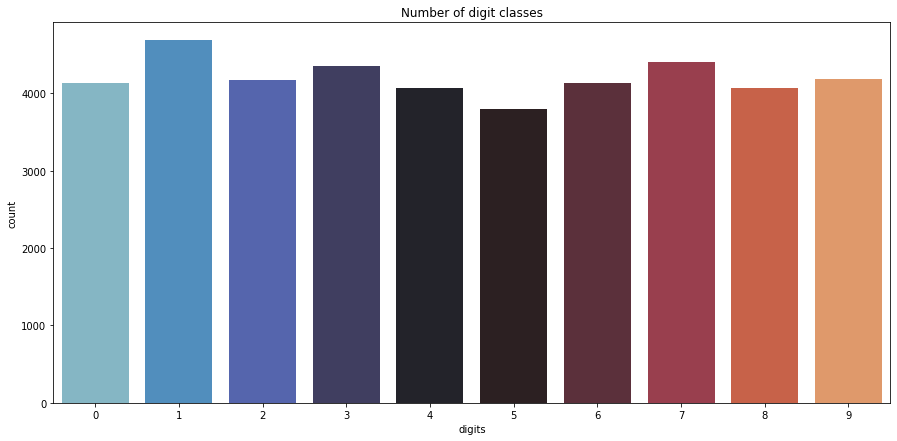

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
plt.xlabel("digits")
plt.show()
Y_train.value_counts()

Seaborn kütüphanesinde count plot ile her bir rakamdan kaç sample olduğu görselleştirilmiştir.

Seaborn'da yaklaşık değerler gözükmektedir.

value_counts() methoduyla her bir rakamdan kaç sample olduğu tam olarak gözükmektedir.

Mesela 0 rakamından 4132 sample, 1 rakamından 4684 sample bulunmaktadır.

Böylelikle datadaki dağılım anlaşılmıştır.



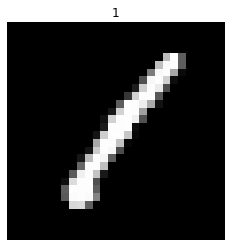

In [11]:
img = [X_train.iloc[0]]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

train datasında 0. indeksteki 1 rakamı plot edilmiştir.

reshape ile görsellerin boyutu 28x28 olduğundan boyutları verilmiştir.

Görseller piksellerden oluştuğu için pikseller imshow parametresi kullanılarak plot edilir.

cmap='gray' ile görseller gray scale edilmiştir. Siyah beyaz olarak görselleştirilmiştir.

Başlık olarak [0,0] indeksinde bulunan görsel 1 rakamı olduğundan 1 yazılmıştır.

axis("off") ile plot edilirken x ve y eksenleri gözükmez.

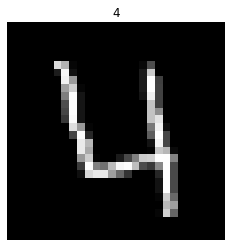

In [12]:
img = [X_train.iloc[3]]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

Üçüncü indekste 4 rakamı bulunmaktadır. Plot edilmiştir.

**Normalization**

Her bir rengin matematiksel karşılığı vardır. (kırmızı-255)

Renk farklılarını önlemek için grayscale normalization yapılır.

Normalization ile tüm renkler 0-1 aralığına çekilir.

Böylelikle CNN daha hızlı çalışır.

In [13]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


**Reshape**

Görseller 28x28 boyutunda 2 boyutludur.

Reshape ile 28x28x1 3 boyutlu matris oluşturulur.

Çünkü Keras bu formatta çalışmaktadır.

Grayscale olduğu için 1 yazılır.

Renkli olsaydı (rgb) 3 yazılacaktı.

In [14]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


**Label Encoding**

Label'da 0-9 arası rakamlar bulunmaktadır.

1x10'luk bir vector oluşturur.

Vektörün Sıfırıncı indeksi 0 rakamı için, birinci indeksi 1 rakamı içindir ve bu şekilde devam eder.

Rakamlar bu şekilde indekslere yerleştirilir;

*   2 => [0,0,1,0,0,0,0,0,0,0]

*   4 => [0,0,0,0,1,0,0,0,0,0]

In [15]:
#Label Encoding 
from keras.utils.np_utils import to_categorical #to_categorical methoduyla label encoding yapılır.
Y_train = to_categorical(Y_train, num_classes = 10)

Train datasında model oluşturulurken, validation datasıyla doğrulama yapılır.

Test datasıyla da prediction yapılır.

In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_validation shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_validation shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_validation shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_validation shape (4200, 10)


**Convolutional Neural Network**

CNN nesne tanıma, görsel sınıflandırma için kullanılır.

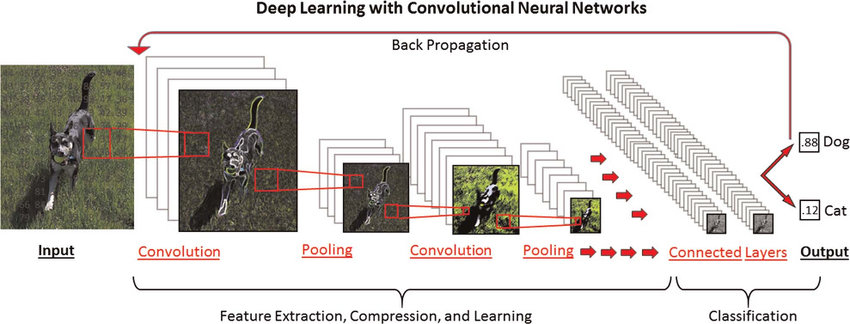

Bir köpek görseli olsun.

Köpeği kediden ayırt eden kulağının sivriliği, gözünün büyüklüğü, kuyruğunun kıvrımı gibi bazı özellikler vardır.

Sınıflandırma yapabilmek için bir filtre ile görseldeki belli başlı yerler ayırt edilmedilir. (**convolution layer**)

Filtreden göz,kulak gibi ortaya çıkan sonuçlar **feature map**'te tutulur. 

**Pooling** ile **down sampling** yapılır. 

Bir matrix boyutu belirlenip,

2x2'lik bir matrix ise bu matrix'ten en büyük değer seçilir.

Bu matrix feature map üzerinde gezdirilir.

Böylelikle convolutional layer'ın size'ı küçülür. 

Downsampling yapılarak hız sağlanılmış olur.

Bunlar pooling layer'da yapılır.

Köpek sağa yatmış bir şekilde durabilir, zıplayabilir. Köpeğin tek bir noktasına odaklanıldığında sınıflandırmak kolaylaşır.

**Down sampling yapılarak overfitting (datanın aşırı ezberlenme durumu) önlenmiş olur.**

Pooling layer'dan sonra bir daha convolutional layer ve pooling layer yapılır.

Genelde convolutional layer sayısı ne kadar artarsa o kadar iyi classification yapılır.

İlk başta önemli featurelar tespit edilemez, yavaş yavaş daha derinlere inilir.

Convolutional sayısı artırılarak görseldeki köpeğin kuyruğu gibi karmaşık şekiller daha iyi tespit edilir.

Böylelikle feature map'ler daha derinleşmiş olur.

Daha sonra **flatten** yapılarak görsel düzleştirilir. (64x64'lük matris'in 1x4096'lık yapılması)

Flatten yapılmasının sebebi filtreleme yapılıp, eleme yapıldıktan sonra artifical neural network kullanılacak olmasıdır.

Çünkü artık featurelar ortaya çıkarılmıştır.

Burada öğrenme ANN kısmında gerçekleşir.

Aynı zamanda convolutional kısmında filtreler de öğrenilir.


**Convolution Operation nedir?**

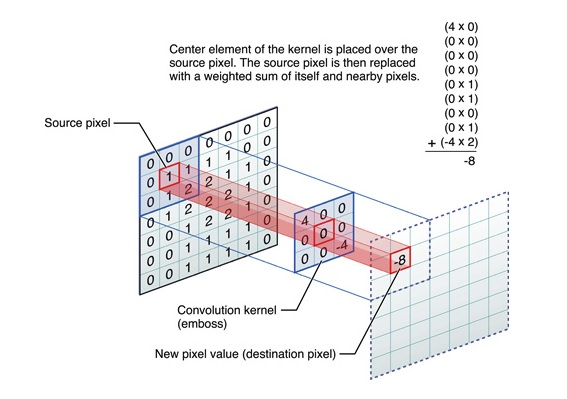

Bir görsel ve 3x3'lük bir feature detector olsun.

**Feature detector** ile görselin ayırt edilmesini sağlayan kulağının sivriliği, gözünün büyüklüğü, kuyruğunun kıvrımı gibi featurelar tespit edilir.

Feature detector 3x3'lük boyutunda bir matris olmak zorunda değildir. 5x5'lik, 9x9'luk da olabilir.

Feature detector'ın boyutu hyperparameter'dır, seçilmesi gerekir.

Feature detector aynı zamanda **kernel** veya **filter** olarak da adlandırılabilir.

**Feature detector köşeler gibi basit şekilleri ve kıvrımlık,ovallik gibi karmaşık şekilleri tespit eder. Mesela input köpek olduğunda köpeğin kulağını ya da köpeğin kuyruğunu tespit eder.**

**Feature map**'te input görseliyle feature detector arasında convolutional yapılır.

Filtrenin indeksleri ile görselde karşılık gelinen indeksler çarpılır.

Her çarpımın sonucu toplanarak convolved feature elde edilir.

Ortaya çıkan matris **feature map**'tir.

**Stride** feature detector'ın görselin üzerinde atlayarak kaymasıdır.

Stride bir olduğunda bir atlayarak kayar, iki olduğunda iki atlayarak kayar.

Görselin boyutu azaltılmıştır. Böylelikle kodun çalışması hızlandırılmış olur. Aynı zamanda matrisin boyutu küçültülerek bilgi kaybı yaşanmış olur.


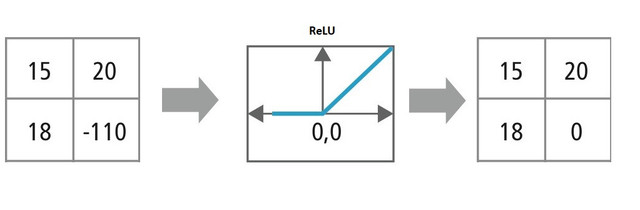

Convolutional layer'da feature map oluştuktan sonra ReLU activation function kullanılır.

0'dan küçük sayılar 0 olarak yazılır.

0'dan büyük sayılar olduğu gibi yazılır.

Böylelikle non linearity artırılmış olur.

Non linearity artırılarak karmaşıklık sağlanmış olur. Böylelikle modelin karmaşık şeyler öğrenerek datayı daha iyi öğrenmesi sağlanmış olur.

**Same Padding**

Convolutional layer'dan sonra oluşan feature map'in size'ı orijinal görselden küçüktür ve veri kaybedilmiş olur.

Bunu önlemek için padding yöntemi kullanılır.

Same padding yöntemiyle input size ile output size aynı olmuş olur.

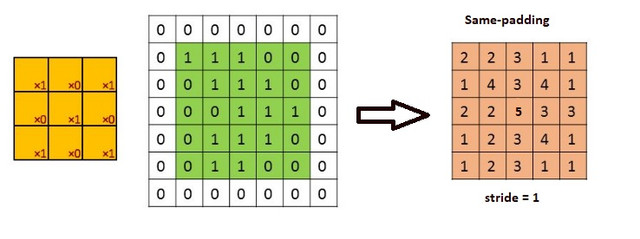

Yeşil kısım görselin kendisidir.

Görselin etrafına 0'lardan oluşan bir çerçeve yapılır.

Böylelikle oluşan feature map'in size'ı ile input görselinin size'ı aynı olur.

Same padding yapmanın önemi;

Birden fazla convolutional layer kullandığında, her layer sonunda veri kaybedileceğinden en sonda çok az bir veri kalır.

Bu yüzden veri kaybını önlemek amacıyla bu yöntem kullanılır.

**Max Pooling**

Same padding yöntemiyle size korunmuştu.

Feature map oluşturulduktan sonra down sampling yapılarak size düşürülür.  



Down sampling ile feature'ın ölçeği, yönü değiştiğinde tek bir noktaya odaklanarak sınıflandırmak kolaylaştırılır(Bir köpek görselde sağa bakabilir, zıplayabilir).

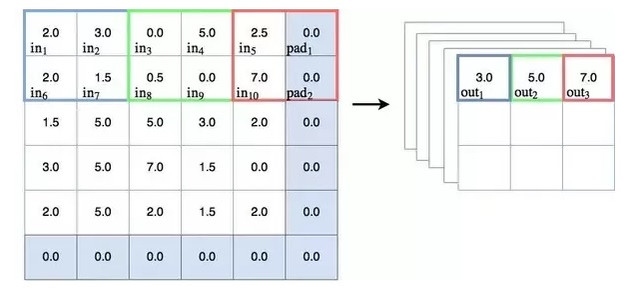

6x6'lık matrix convolutional layer sonucu oluşan feature map'tir.

Bu matrix'te pooling yapılmak için 2x2'lik bir matrix seçilmiştir.

2x2'lik matrix görselde gezerek en büyük değeri seçer.

Böylelikle boyut azaltılma yapılmış olur.

**Flattening**

Flatten yöntemiyle matrix tek bir satır haline getirilerek boyut düşürülür.

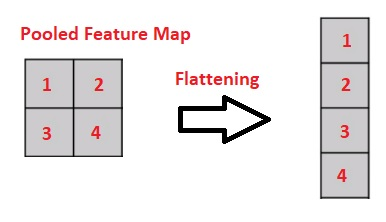

2x2'lik matrix 1x4'lük size'a getirilerek tek bir satır elde edilir.

Flatten yöntemiyle elde edilen matrix artificial neural network'de kullanılacak inputlardır.

**Full Connection**

Classification yapılan, sigmoid activation function'ı içeren artifical neural network kısmıdır.

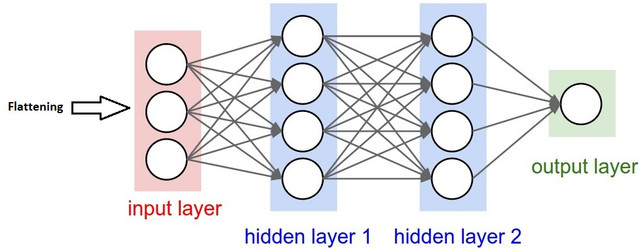

Fully connected, neural network'teki her bir node'un bir önceki layer'daki node'larla bağlantısı olması durumudur.

# **CNN Implementing with Keras**

**Create Model**

Keras kullanılmasının sebebi yazması ve bir şey ekleyip çıkarılması kolaydır.

**Dropout:** Training boyunca hidden layer ya da input layer'a bir threshold koyulup, bu threshold'un altındaki nodeların kaldırılarak accuracy değerini artırılmasıdır.

Böylelikle modelin overfitting (datayı aşırı ezberleme) yapmasının önüne geçilmiş olur.

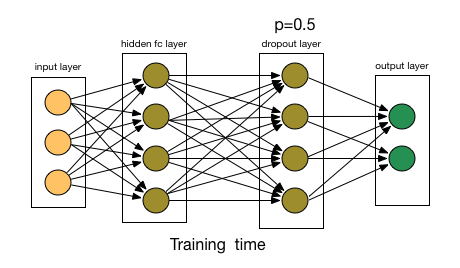

Dropout'ta koyulan threshold 0-1 arasındadır.



Run etme süresinin kısa olması için böyle bir model belirlenmiştir;

conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import  RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential() #Sequential methodu çağrılarak neural network yapısı initialize edilir.
                     #içerisinde layerlar bulunur.

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
#ilk olarak convolutional layer eklenir.
#filters -> feature detector, 8 tane seçilmiştir.
#kernel_size -> feature detector boyutu
#same padding yöntemi kullanılarak feature map ile input size aynı olması sağlanmıştır.
#activation function relu seçilmiştir.
#input_shape ile reshape ile 3 boyutlu yapılan görsellerin boyutu girilir.

model.add(MaxPool2D(pool_size=(2,2)))
#max pooling yöntemi ile 2x2'lik matrix feature map üzerinde gezdirilir.
#2x2'lik matrix'ten en büyük değer seçilerek boyut indirgeme yapılmış olur.

model.add(Dropout(0.25))
#dropout'taki threshold 0.25 koyulmuştur.
#dropout yöntemiyle input ya da hidden layerdaki bazı nodelar kapatılarak overfitting önlenir.

#bir kere daha convolutional -> pooling -> dropout yapılır.
#art arda yapıldığı için görsel boyutu bilindiğinden tekrardan input_shape girilmez.
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#strides=(2,2) ile pooling yapılırken 2'ye 2 atlayarak gidilir.
model.add(Dropout(0.25))


# fully connected

model.add(Flatten())
#flatten yapılarak max pooling sonucu oluşan matrix düzleştirilir.

model.add(Dense(256, activation = "relu"))
#bir hidden layer eklenerek activation function relu yapılır.
#hidden layer'a 256 node'dan oluşur.

model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))
#output layer için activation function olarak sigmoid değil softmax seçilmiştir.
#sigmoid function binary classification'da kullanılır.
#softmax function multi out classification'da kullanılır.
#0-9 arası 10 rakam olduğu için output layer'a 10 node'dan oluşur.

**Define Optimizer**

**Adaptive Momentum Optimizer (Adam)** -> learning rate değeri normalde sabittir. Adam ile learning rate değiştirilir.

In [18]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
#beta_1 ve beta_2 learning rate'in değişimini etkileyen parametrelerdir.
#Eğer learning rate küçükse ve minimum cost'a ulaşmak uzun sürüyorsa learning rate artırılır.
#Eğer büyükse de azaltılır.

**Compile Model**

In [19]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
#neural network compile edilir.
#model değerlendirilirken accuracy metriği kullanılacaktır.
#binary cross entropy yerine categorical cross entropy kullanılmasının sebebi classification 2'den fazladır.

**Epochs and Batch Size**

Datada 10 sample (10 görsel) olduğunda;

Batch size 2 seçilsin. Bu durumda forward ve backward propagation her seferinde 2 görsel ile yapılır.

10/2=5 -> toplamda 5 kez batch yapılır. Çünkü bir tane batch yapmak için gerekli olan size 2'dir. 

10 resim 5 kez batch yapıldığında, 10 resim de forward ve backward propagation yapılmış olur. Bu da bir epoch olarak adlandırılır. Yani her epoch'da 5 kez batch yapılır.

3 epoch yapılmak istendiğinde (3*5=15) kez batch yapılır.



In [20]:
epochs = 10  
batch_size = 250

**Data Augmentation**

Overfittingi önlemek için datanın yapay olarak genişletilmesi lazımdır.

Training data küçük dönüşümlerle değiştirilerek yeniden üretilir.

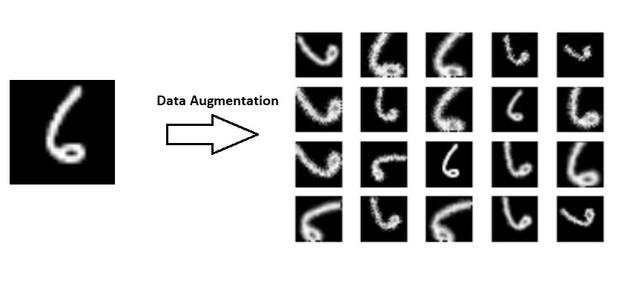

Görsele zoom-in, zoom-out yapılır, rotasyonu değiştirilir.

Bunun yapılmasının sebebi 6 sayısı farklı şekilde yazıldığı zaman bunu anlamak training data yeniden üretilir.

In [21]:
# data augmentation
datagen = ImageDataGenerator( #kerasta bulunan ImageDataGenerator methoduyla data otomatik olarak büyütülür.
        featurewise_center=False,  #datada input mean'i 0 olarak ayarlama
        samplewise_center=False,   #her sample'ın ortalamasını 0'a ayarlama
        featurewise_std_normalization=False,  #inputların datanın standard deviation'ına bölünmesi
        samplewise_std_normalization=False,   #sampleların kendi standard deviation'a bölünmesi
        zca_whitening=False,    #dimesion reduction(boyut azaltma)
        rotation_range=0.5,       #görüntü döndürme
        zoom_range = 0.5,       #Random bir şekilde %10 oranında görüntüleri büyütme
        width_shift_range=0.5,  #görseli yüzde 5 enlemden kaydırır.
        height_shift_range=0.5, #görseli yüzde 5 boylamdan kaydırır.
        horizontal_flip=False,  #görüntü çevirme
        vertical_flip=False)    #görüntü çevirme

datagen.fit(X_train) #fit methoduyla bu özellikler x_train datasına uygulanır.

**Fit the model**

In [22]:
#Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 34s 220ms/step - loss: 2.2172 - accuracy: 0.1752 - val_loss: 1.8189 - val_accuracy: 0.3557
Epoch 2/10
151/151 [==============================] - 28s 184ms/step - loss: 1.9285 - accuracy: 0.3076 - val_loss: 1.2573 - val_accuracy: 0.6593
Epoch 3/10
151/151 [==============================] - 28s 184ms/step - loss: 1.7214 - accuracy: 0.3928 - val_loss: 0.8707 - val_accuracy: 0.7610
Epoch 4/10
151/151 [==============================] - 31s 203ms/step - loss: 1.5885 - accuracy: 0.4466 - val_loss: 0.6417 - val_accuracy: 0.8338
Epoch 5/10
151/151 [==============================] - 29s 195ms/step - loss: 1.5027 - accuracy: 0.4801 - val_loss: 0.5132 - val_accuracy: 0.8667
Epoch 6/10
151/151 [==============================] - 28s 186ms/step - loss: 1.4522 - accuracy: 0.4990 - val_loss: 0.4026 - val_accuracy: 0.9055
Epoch 7/10
151/151 [==============================] - 28s 186ms/step - loss: 1.4032 - accuracy: 0.5163 - val_loss: 0.3778 - val_ac

Train datasındaki sample sayısı 37800,

batch size 250,

37800/250 = 151 batch,

Her epoch'ta 151 defa forward backward propagation yapılır.

validation accuracy %35'ten %93'e çıkmıştır.

Accuracy artırmak için;

*   epoch artırılabilir.
*   Data Augmentation kısmındaki değerler değiştirilebilir.
*   batch size değiştirilebilir.
*   layer eklenebilir.
*   filters ve kernel_size parametreleri değiştirilebilir.

Hyper parameter sayısı çok fazladır. En yüksek accuracy'e ulaşmak için saatlerce/günlerce denemek gerekir.

**Evaluate the model**

Loss function'ın epoch sayısına göre değişimi;

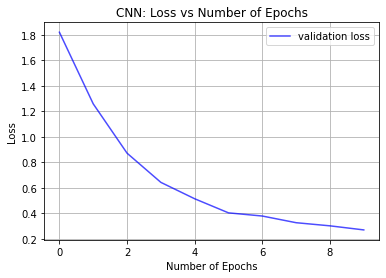

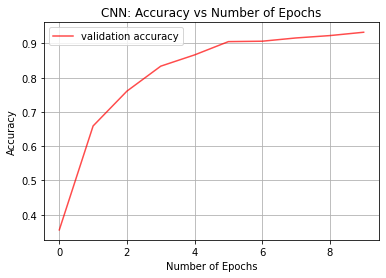

In [23]:
plt.plot(history.history['val_loss'], color='b', label="validation loss",alpha=0.7)
#plt.plot(history.history['val_accuracy'], color='r', label="validation accuracy",alpha=0.7)
plt.title("CNN: Loss vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['val_accuracy'], color='r', label="validation accuracy",alpha=0.7)
plt.title("CNN: Accuracy vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

epoch sayısı arttıkça loss değeri 0.0'lara kadar düşecektir.

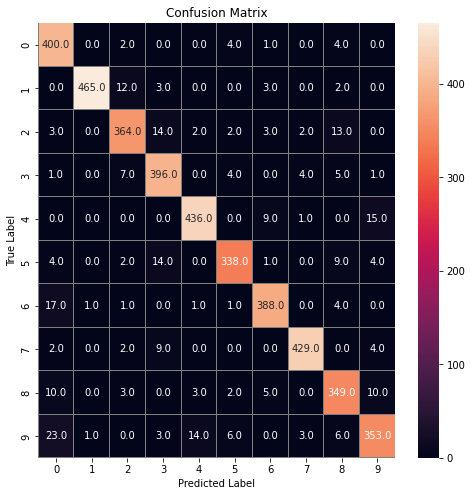

In [24]:
import seaborn as sns

Y_pred = model.predict(X_val) #model predict edilir.
Y_pred_classes = np.argmax(Y_pred,axis = 1) #y_pred'in indeksleri bulunur.
Y_true = np.argmax(Y_val,axis = 1) #y_val'nun indeksleri bulunur.
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) #confusion matrix oluşturulur.

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Confusion matrix'e bakıldığında;

1 görselinin 465 tanesi doğru predict edilmiş, 12 tanesi 2 olarak predict edilmiştir.

9'un 0'la ve 4'le çok karıştığı görülür.

6'nın 0'la karıştığı görülür.

Birbiriyle karışan görseller için sayıları artırılabilir.